<h1 style="color:#ff4654;font-size:80px;"><strong>Valorant <strong style="color:black">Data Analysis</strong></strong></h1>

In [1]:
# Importing the necessary packages (Hidden Input/Output)
import gc
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
%matplotlib inline

# To Ignore any warnings
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:#ff4654;font-size:60px;"><strong>About</strong> <strong style="color:black">Valorant: </strong></h1> 

<p style="font-size:120%">Valorant is a <strong>free-to-play first-person hero shooter developed and published by Riot Games</strong>, for Microsoft Windows. First teased under the codename Project A in October 2019, the game began a closed beta period with limited access on April 7, 2020, followed by an official release on June 2, 2020. The development of the game started in 2014.</p>

<img src="https://c.tenor.com/eU8QK78ETZ4AAAAC/valorant-yoru.gif" style="width:100%"></img>

<h1 style="color:#ff4654;font-size:60px;"><strong>Valorant</strong> <strong style="color:black">Gameplay: </strong></h1> 

<p style="font-size:120%">Valorant is a team-based first-person hero shooter set in the near future. Players play as one of a set of agents, characters designed based on several countries and cultures around the world. In the main game mode, <mark>players are assigned to either the <strong>attacking or defending team</strong> with each team having <strong>five players</strong> on it.</mark> Agents have <strong>unique abilities</strong>, each requiring charges, as well as a unique ultimate ability that requires charging through kills, deaths, orbs, or spike actions. Every player starts each round with a "classic" pistol and one or more "signature ability" charges. <mark>Other weapons and ability charges can be purchased using an in-game economic system that awards money based on the outcome of the previous round, any kills the player is responsible for, and any actions taken with the spike</mark>. The game has an assortment of weapons including secondary guns like sidearms and primary guns like submachine guns, shotguns, machine guns, assault rifles and sniper rifles. There are automatic and semi-automatic weapons that each have a unique shooting pattern that has to be controlled by the player to be able to shoot accurately. Different agents allow players to find more ways to plant the Spike and style on enemies with scrappers, strategists, and hunters of every description. It currently offers 16 agents to choose from. They are Brimstone, Viper, Omen, Cypher, Sova, Sage, Phoenix, Jett, Raze, Breach, Reyna, Killjoy, Skye, Yoru, Astra, and KAY/O.</p>

<img src="https://thumbs.gfycat.com/FeminineHardtofindGuernseycow-size_restricted.gif" style="width:100%"></img>

<p style="font-size:120%">In the standard non-ranked mode also known as "Un-rated", <mark>the match is played as <strong>best of 25</strong> - the first team to win 13 rounds wins the match</mark>. The attacking team has a bomb-type device called the Spike. They must deliver and activate the Spike on one of the multiple specified locations (bomb sites). If the attacking team successfully protects the activated Spike for 45 seconds it detonates, destroying everything in a specific area, and they receive a point. If the defending team can deactivate the spike, or the 100-second round timer expires without the attacking team activating the spike, the defending team receives a point. If all the members of a team are eliminated before the spike is activated, or if all members of the defending team are eliminated after the spike is activated, the opposing team earns a point. If both teams win 12 rounds, sudden death occurs, in which the winning team of that round wins the match, differing from overtime for competitive matches. Additionally, if after 4 rounds, a team wishes to forfeit that match, they may request a vote to surrender. If the vote is unanimous, the winning team gets all the victory credit for every round needed to bring them to 13, with the forfeiting team receiving losing credit. A team gets only two chances to surrender: one as the attackers and the other as the defenders. (Source: <a href="https://en.wikipedia.org/wiki/Valorant" style="text-decoration:none">Wikipedia</a>)</p>

<h1 style="color:#ff4654;font-size:60px;"><strong>Our</strong> <strong style="color:black">Objective:</strong></h1>

<p style="font-size:200%">Can we construct a <strong>team of top 5 Agents?</strong> The team should consist <strong>atleast one Agent from each category</strong>: Initiator, Duelist, Sentinel and Controller.</p> 

<h1 style="color:#ff4654;font-size:60px;"><strong>Agent</strong> <strong style="color:black">Data:</strong></h1>

In [2]:
# Reading the Agent Dataframe (Hidden Input)
agent = pd.read_csv('../input/valorant-statistics/ValorantData.csv')
agent = agent.iloc[:,1:] # Removing the Rank column. It is not useful for our analysis
agent.head().style.set_properties(**{"background-color": "#ff4654","color": "black","border-color": "black"})

,Agent,Win%,KD,Pick%,1stAbility,2ndAbility,3rdAbility,Ultimate,Type
0,Jett,50.000000,1.110000,14.500000,6.200000,7.900000,8.700000,1.900000,Duelist
1,Reyna,51.100000,1.140000,13.300000,5.700000,3.500000,10.000000,1.200000,Duelist
2,Sage,50.900000,0.900000,12.300000,7.100000,6.300000,6.800000,1.100000,Sentinel
3,Raze,50.400000,1.010000,10.000000,8.700000,9.200000,7.400000,1.600000,Duelist
4,Sova,49.500000,0.930000,6.800000,8.800000,16.200000,4.100000,1.400000,Initiator


<p style="font-size:120%">In this game, the player can choose from <strong>16 characters</strong>. These characters are broadly divided into <strong>4 categories: Duelists, Sentinel, Initiator and Controller.</strong></p>

<p style="font-size:120%"><strong>Duelists:</strong> Specialize in attacking and entering a bomb site for the team.</p>
<p style="font-size:120%"><strong>Sentinel:</strong> Are the defensive line, which specializes in locking down sites and protecting teammates from enemies.</p>
<p style="font-size:120%"><strong>Initiator:</strong> Plan out the offensive pushes. Initiators specialize in breaking through defensive enemy positions.</p>
<p style="font-size:120%"><strong>Controller:</strong> Specialize in "slicing up dangerous territory to set their team up for success." They use their abilities to create coverage or clear out areas of space with crowd control.</p>

<h1 style="color:#ff4654;font-size:40px;"><strong>Let's look at some Agents</strong></h1>

![ValAgents](https://s3.us-east-1.amazonaws.com/dexerto-assets-production-cbbdf288/uploads/2020/06/02133540/valorant-agents-roles.jpg)

<p style="font-size:120%">Now, these are only a few of the <strong>16 Agents</strong> that we have in the game right now.</p>
<p style="font-size:120%">Personally, <mark>my favourite Agents are <strong>Raze and Cypher</strong>.😁</mark></p>

<h1 style="color:#ff4654;font-size:60px;"><strong>Top 5 Agents</strong> <strong style="color:black">Win Rate:</strong></h1>

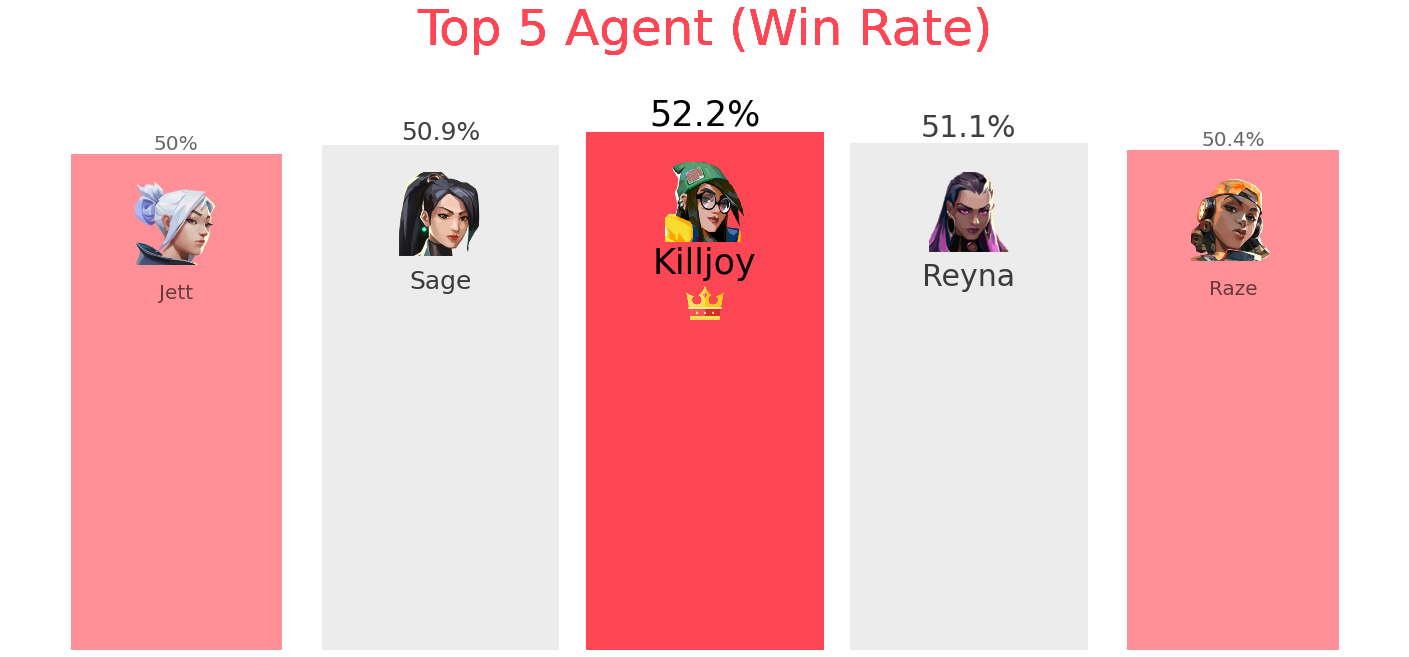

In [3]:
# Getting the Agents with top win rate: (Hidden Input)
# top_win_rate = agent[['Agent','Win%']].sort_values(ascending=False, by='Win%')

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# Method for image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

# My Images
img_file1 = "https://static.wikia.nocookie.net/valorant/images/1/15/Killjoy_icon.png/revision/latest/scale-to-width-down/200?cb=20200805002141"
img_file2 = "https://static.wikia.nocookie.net/valorant/images/b/b0/Reyna_icon.png/revision/latest/scale-to-width-down/100?cb=20200607180311"
img_file3 = "https://static.wikia.nocookie.net/valorant/images/7/74/Sage_icon.png/revision/latest/scale-to-width-down/185?cb=20201128234057"
img_file4 = "https://static.wikia.nocookie.net/valorant/images/3/35/Jett_icon.png/revision/latest/scale-to-width-down/185?cb=20201128234156"
img_file5 = "https://static.wikia.nocookie.net/valorant/images/9/9c/Raze_icon.png/revision/latest/scale-to-width-down/185?cb=20201128234400"
crown_img = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"

zoom = 1
img_y= 4.8

# I wanted to have the highest value in the middle, so i wrote the following two code lines
agents = ['Jett','Sage','Killjoy','Reyna','Raze']   #new_df.index
win_rate = [50,50.9,52.2,51.1,50.4]   #list(new_df.Q1.values)

color = ['#ff4654', '#E6E6E6','#ff4654','#E6E6E6','#ff4654'] # Deciding the color
width = [0.8, 0.9, 0.9, 0.9, 0.8] # The Width
alpha = [0.6, 0.75, 1.0, 0.75, 0.6] # The Opacity

fontsize= [20, 25, 35, 30, 20]
x_num = [0,1,2,3,4]

for i in range(5):
    plt.bar(x=agents[i],height=win_rate[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=str(win_rate[i])+'%',x=x_num[i],y=win_rate[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s=agents[i],x=x_num[i],y=win_rate[i]-15,va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Top 5 Agent (Win Rate)",x=2,y=60,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#ff4654')

# Placing the image
make_img(img_file1,0.4, 2, 45.2)  # position: height minus 7
make_img(img_file2,0.8, 3, 44.1) 
make_img(img_file3,0.45, 1, 43.9) 
make_img(img_file4,0.45, 0, 43)
make_img(img_file5,0.45, 4, 43.4)
make_img(crown_img,0.2, 2, 35.2)

gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

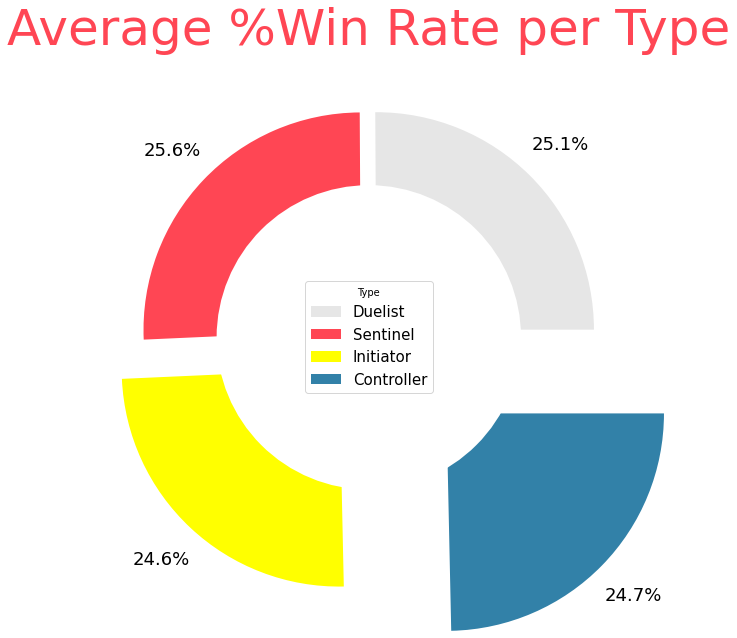

In [4]:
# Checking the Win Rates for different Types (Hidden Input)
df_win_rate = agent[['Win%','Type']]
initiator_wrate = df_win_rate[df_win_rate['Type'] == 'Initiator'].sort_values(by='Win%')
controller_wrate = df_win_rate[df_win_rate['Type'] == 'Controller'].sort_values(by='Win%')
sentinel_wrate = df_win_rate[df_win_rate['Type'] == 'Sentinel'].sort_values(by='Win%')
duelist_wrate = df_win_rate[df_win_rate['Type'] == 'Duelist'].sort_values(by='Win%')

# Grouping to get the mean of 
grp_initiator = initiator_wrate.groupby(by="Type").mean()
grp_controller = controller_wrate.groupby(by="Type").mean()
grp_sentinel = sentinel_wrate.groupby(by="Type").mean()
grp_duelist = duelist_wrate.groupby(by="Type").mean()

type_lis = list(df_win_rate['Type'].unique())
tot_win_lis = []

for type_ in type_lis:
    if type_ in "Initiator":
        tot_win_lis.append(grp_initiator['Win%'][0])
    if type_ in "Sentinel":
        tot_win_lis.append(grp_sentinel['Win%'][0])
    if type_ in "Controller":
        tot_win_lis.append(grp_controller['Win%'][0])
    if type_ in "Duelist":
        tot_win_lis.append(grp_duelist['Win%'][0])
        

# Visualizing using Donut plot
# colors
colors = ['#E6E6E6', '#ff4654', '#FFFF00', 
          '#3281a8']
# explosion
explode = (0.05, 0.05, 0.2,0.5)
  
    
plt.figure(figsize=[20,10])    

# Pie Chart
plt.pie(tot_win_lis, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode, textprops={'fontsize': 18})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(type_lis, loc = "center",title="Type", prop={'size': 15})
     
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    

# Adding Title of chart
plt.text(s="Average %Win Rate per Type",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#ff4654')
  
gc.collect()    
# Displaing Chart
plt.show()

<h1 style="color:#ff4654;font-size:40px;"><strong>"Relax. I've already thought of everything" <strong style="color:black">- Killjoy </strong></strong></h1>

<p style="font-size:120%">In the current patch, two Sentinel Type heroes: <strong>Killjoy and Sage</strong> are among the top 3. <strong>Followed by 3 Duelists</strong>. This goes to show that, <mark>either Sage or Killjoy as a sentinel would be a better choice.</mark></p>

<p style="font-size:120%">Also, from the donut chart we can understand that <mark>the presence of <strong>Sentinels and Duelist</strong> do favor a win.</mark></p>

<h1 style="color:#ff4654;font-size:40px;"><strong>Killjoy's 1st Ability <strong style="color:black">- Nanoswarm </strong></strong></h1>

<p style="font-size:120%"><strong>EQUIP</strong> a Nanoswarm grenade. <strong>FIRE</strong> to throw the grenade. <mark>Upon landing, the Nanoswarm goes covert. <strong>ACTIVATE</strong> the Nanoswarm to deploy a damaging swarm of nanobots.</mark></p>

<img src="https://static-prod.weplay.tv/2020-08-10/8b1f3333c531da64f0adf1935b4726f7.5A4F49-D193DD-D0A892.gif" style="width:100%"></img>

<h1 style="color:#ff4654;font-size:40px;"><strong>Killjoy's 2nd Ability <strong style="color:black">- Alarmbot </strong></strong></h1>

<p style="font-size:120%"><strong>EQUIP</strong> a covert Alarmbot. <strong>FIRE</strong> to deploy <mark>a bot that hunts down enemies that get in range.</mark> After reaching its target, the bot explodes and applies Vulnerable to enemies in the area. <strong>HOLD EQUIP</strong> to recall a deployed bot.</p>

<img src="https://static-prod.weplay.tv/2020-08-10/5b92ade20a67f0468a79db00d1678487.5C4F56-B99076-9A9CA4.gif" style="width:100%"></img>

<h1 style="color:#ff4654;font-size:40px;"><strong>Killjoy's 3rd Ability <strong style="color:black">- Turret </strong></strong></h1>

<p style="font-size:120%"><strong>EQUIP</strong> a Turret. <strong>FIRE</strong> to deploy a <mark>turret that automatically fires at enemies in a 180 degree cone</mark>. <strong>HOLD EQUIP</strong> to recall the deployed turret.</p>

<img src="https://static-prod.weplay.tv/2020-08-10/6eb8852cd5fcd1dd137e0fca98e353f2.5B4842-C3B091-6CC6D1.gif" style="width:100%"></img>

<h1 style="color:#ff4654;font-size:40px;"><strong>Killjoy's Ultimate <strong style="color:black">- Lockdown </strong></strong></h1>

<p style="font-size:120%"><strong>EQUIP</strong> the Lockdown device. <strong>FIRE</strong> to deploy the device. After a long windup, the device <strong>Detains all enemies caught in the radius</strong>. The device can be destroyed by enemies.</p>

<img src="https://bitmunchies.com/wp-content/uploads/2020/07/1595914024_662_New-Valorant-agent-Killjoy-abilities-revealed-through-leak.jpg" style="width:100%"></img>

<p style="font-size:120%">Killjoy's Ultimate ability <mark>can clear out an entire site of enemies.</mark> This is a <strong>very good crowd control technique</strong>. Also, her 3rd ability <strong>Turret can be used to guard corners</strong>. This allows Killjoy players to be very versatile.</p>

<p style="font-size:120%">Another good thing about Killjoy is that <strong>her alarmbot can notify her about any enemies.</strong></p>

<p style="font-size:120%"><mark>She can also activate her <strong>nanoswarms</strong> to kill enemies.</mark> And that makes Killjoy a very versatile Sentinel.</p>

<h1 style="color:#ff4654;font-size:60px;"><strong>Top 10 Agents</strong> <strong style="color:black">KD Ratio:</strong></h1>

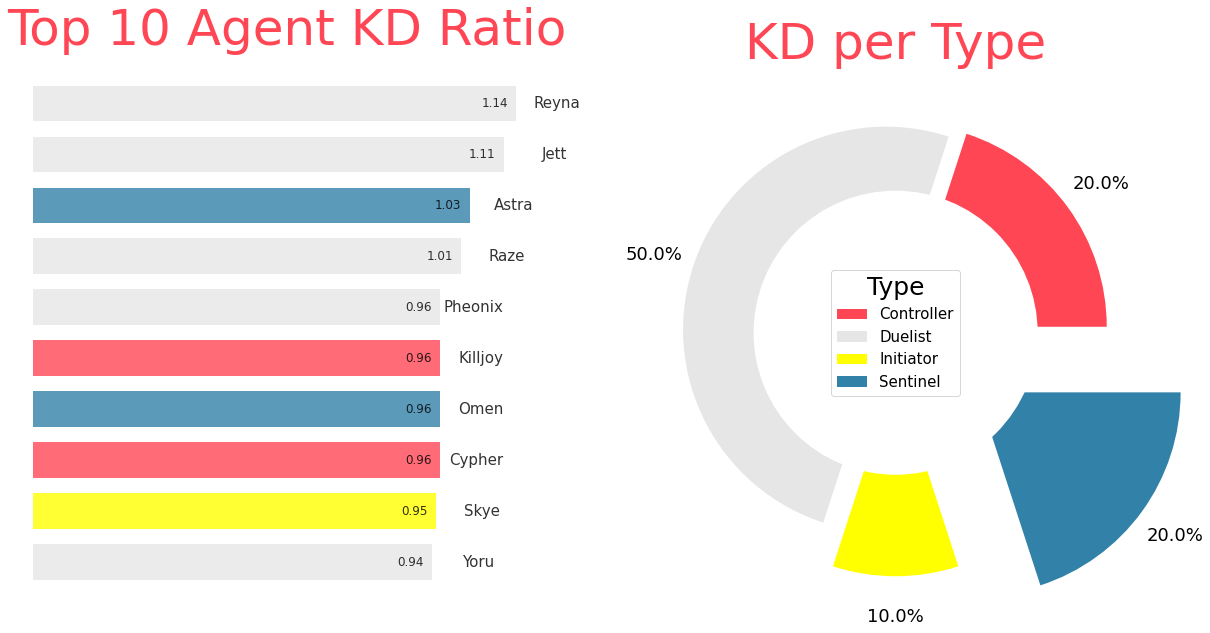

In [5]:
# Dataframe containing all the data  (Hidden Input)
agent_kd = agent[['Agent','KD','Type']].sort_values(by='KD', ascending=False)
agent_kd_10 = agent_kd.iloc[:10,:]
agent_kd_10

# This time, I will make a subplot
plt.figure(figsize=[20,10])

######################################## For the KD ratio ##########################################
plt.subplot(1, 2, 1)

s1 = list(agent_kd_10['Agent'])
x1 = list(agent_kd_10['KD'])
y1 = [0,1,2,3,4,5,6,7,8,9]

plt.barh(width=x1, y=s1, height=0.7, color = ['#E6E6E6', '#E6E6E6', '#3281a8', '#E6E6E6','#E6E6E6','#ff4654','#3281a8','#ff4654'
                                                    ,'#FFFF00','#E6E6E6'], alpha=0.8)

for i in range(10):
    plt.text(s = str(x1[i]), x=x1[i]-0.02, y=y1[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)
    plt.text(s = s1[i], x=x1[i]+0.15, y=y1[i] ,font = 'Comic Sans MS', fontsize=15,va='center',ha='right',alpha=0.8)

plt.title("Top 10 Agent KD Ratio", fontsize=50,va='bottom',ha='center',color='#ff4654')
plt.axis('off')
gc.collect()
plt.gca().invert_yaxis()

####################################################################################################
######################################## For the KD ratio per type #################################
plt.subplot(1, 2, 2)

grp_kd = agent_kd_10[['KD','Type']].groupby('Type').count()

# Visualizing using Donut plot
# colors
colors = ['#ff4654', '#E6E6E6', '#FFFF00',
          '#3281a8']
# explosion
explode = (0.05, 0.05, 0.2,0.5)   

# Pie Chart
plt.pie(list(grp_kd['KD']), colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode, textprops={'fontsize': 18})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(list(grp_kd.index), loc = "center",title="Type", prop={'size': 15})
     
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    

# Adding Title of chart
plt.text(s="KD per Type",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#ff4654')
  
gc.collect()    
# Displaing Chart
plt.show()





<div class="row" style="display: flex;">
  <div class="column" style="flex: 33.33%;padding: 5px;">
    <img src="https://images.contentstack.io/v3/assets/bltb6530b271fddd0b1/bltceaa6cf20d328bd5/5eb7cdc1b1f2e27c950d2aaa/V_AGENTS_587x900_Jett.png" style="width:80%">
  </div>
  <div class="column" style="flex: 33.33%;padding: 5px;">
    <img src="https://images.contentstack.io/v3/assets/bltb6530b271fddd0b1/blt6577b1f58530e6b2/5eb7cdc121a5027d77420208/V_AGENTS_587x900_Reyna.png" style="width:80%">
  </div>
  <div class="column" style="flex: 33.33%;padding: 5px;">
    <img src="https://images.contentstack.io/v3/assets/bltb6530b271fddd0b1/blt5599d0d810824279/6036ca30ce4a0d12c3ec1dfa/V_AGENTS_587x900_Astra.png" style="width:80%">
  </div>
</div>


<h1 style="color:#ff4654;font-size:40px;"><strong>"They will cower!" <strong style="color:black">- Reyna </strong></strong></h1>

<p style="font-size:120%"><strong>Reyna</strong> has abilities that <strong>allows her character to be played solo</strong>. She has many tools in her arsenel that help her take fights against many foes.</p>

<p style="font-size:120%">Her abilities include a <strong>Flash, which blinds the enemy</strong>. After killing her enemy, <mark>Reyna can choose to <strong>re-position</strong> herself with the enemy's soul/orb or <strong>heal</strong> herself.</mark></p>

<p style="font-size:120%">This way, <mark>she is able to take fights without depending much on her teammates.</mark></p>

<h1 style="color:#ff4654;font-size:40px;"><strong>"Get out of my way!"<strong style="color:black">- Jett </strong></strong></h1>

<img src="https://thumbs.gfycat.com/AgitatedSlimHoverfly-size_restricted.gif" style="width:100%"></img>

<p style="font-size:120%"><strong>Jett</strong> is another Duelist that <strong>is very very strong if played correctly</strong>. She can throw smokes to cover herself and blind her enemies.</p>

<p style="font-size:120%">She can <strong>dash, foward, backward, left or right to avoid being hit by another agent's ability or bullets</strong>. She can also use this ability to reposition herself.</p>

<p style="font-size:120%">She can <strong>glide for a short distances</strong> in the wind and get on top of structures by propelling herself using her wind ability. These make some amazing plays.</p>

<p style="font-size:120%">Her ultimate ability summons several <strong>throwing knives</strong> around her <mark>which she can shoot in burst or in single taps</mark>. They deal lethal damage to their opponents</p>

<h1 style="color:#ff4654;font-size:40px;"><strong>"You are divided!"<strong style="color:black">- Astra </strong></strong></h1>

<img src="https://c.tenor.com/t0U2Y-p-pngAAAAC/astra.gif" style="width:100%"></img>

<p style="font-size:120%"><strong>Astra</strong> is a Controller agent with a kit unlike any other in the game. <mark>Controlling the map with the stars from her Astral form, she rewards the players that take the time to plan out how they want their rounds to go before they even start.</mark> She’s a complement to any player that knows how to use their abilities with discipline. <strong>With two smokes, a stun, a gravity well and a map splitting ultimate</strong>, she will be a valuable member of any five stack.</p>

<p style="font-size:120%">Her kit is refreshing and features some of the <strong>most dynamic abilities in the game</strong>. Using stars that must be preselected on the map to activate her abilities, <mark>she is a big brain agent that only gets better as you understand more about her kit</mark>. While she has the ability to push, <mark>you want to <strong>play her slowly</strong> and have her be one of the last ones into a fight.</mark></p>

<h1 style="color:#ff4654;text-align:center"><strong>Work in Progress 👷‍♂️ </strong></h1>
<h2 style="color:#ff4654;text-align:center"><strong>Drop an Upvote if you like/fork. Thanks for Reading. </strong></h2>
<h2 style="color:#ff4654;text-align:center"><strong>Do read my other notebooks </strong></h2>